# ML n DL for Programmers
-------------------------------
### Session II

# Write a program to predict what user will type next.
![predictive keyboard](images/predictive_keyboard.gif)

## Bit of thinking
* What input and output should be
  - Input will be some sequence of characters, and output will be sequence of characters.
* Neural nets are just matrix multiplication. How to represent text as numbers.
  

## Enter One Hot Encoding (Preprocessing)

#### Example:
* Sentence:
  - Some random sentence to show some thing
  
* Make it a set (Only unique values):
  - ['Some', 'random', 'sentence', 'to', 'show', 'thing'}]

  
* Represent them by number (Label encoding):
  - [1, 2, 3, 4, 5, 6]
  
* Convert each of them to binary vector:
  $$\begin{vmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{vmatrix}$$

### Ok, now let's code

* First let's do manually.
* We will require numpy.


In [1]:
!pip install numpy

  Using cached https://files.pythonhosted.org/packages/ff/7f/9d804d2348471c67a7d8b5f84f9bc59fd1cefa148986f2b74552f8573555/numpy-1.15.4-cp36-cp36m-manylinux1_x86_64.whl


In [2]:
# Import required libraries
import numpy as np
from numpy import argmax

In [3]:
# define input string
data = 'hello world'
print(data)
# define universe of possible input values
alphabet = 'abcdefghijklmnopqrstuvwxyz '
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

hello world


In [5]:
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)

[7, 4, 11, 11, 14, 26, 22, 14, 17, 11, 3]


In [6]:
# one hot encode
onehot_encoded = list()
for value in integer_encoded:
    letter = [0 for _ in range(len(alphabet))]
    letter[value] = 1
    onehot_encoded.append(letter)
print(np.array(onehot_encoded))

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
# invert encoding
inverted = int_to_char[argmax(onehot_encoded[0])]
print(inverted)

h


## Now get the data
* Common way:
    - Use some api, eg. pubmed
    - Use data available on internet, eg. kaggle, UCI repository, google dataset search
    - Scrap websites

* We will use gensim (language modelling library) to download text8 dataset.

In [8]:
# get gensim
!pip install gensim

  Using cached https://files.pythonhosted.org/packages/27/a4/d10c0acc8528d838cda5eede0ee9c784caa598dbf40bd0911ff8d067a7eb/gensim-3.6.0-cp36-cp36m-manylinux1_x86_64.whl


In [9]:
import gensim.downloader as api

api.info("text8")

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [10]:
# download and load data
text8_path = api.load("text8", return_path=True)
text8_path

'/home/ashwanipandey/gensim-data/text8/text8.gz'

In [12]:
from smart_open import smart_open

text8_data = ""
with smart_open(text8_path, 'rb') as file:
    for line in file:
        line = line.decode('utf8')
        text8_data += line
text8_data = text8_data.strip()
text8_data = text8_data[:100000]
print(f'Lenght of Corpus: {len(text8_data)}')

Lenght of Corpus: 100000


### Prepare character to Index and Index to Character dictionary

In [13]:
chars = sorted(list(set(text8_data)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'unique chars: {len(chars)}')

unique chars: 27


#### Prepare training dataset
* Let's take previous 30 characters to predict next character.
* And we will break sentences with step of 3.

In [14]:
SEQUENCE_LENGTH = 30
STEP = 3
sentences = []
next_chars = []
for i in range(0, len(text8_data)-SEQUENCE_LENGTH, STEP):
    sentences.append(text8_data[i:i+SEQUENCE_LENGTH])
    next_chars.append(text8_data[i+SEQUENCE_LENGTH])

In [22]:
print(f'number of training sentences: {len(sentences)}')
print(sentences[3])
next_chars[2]

number of training sentences: 33324
 originated as a term of abuse


'u'

#### Now time to generate features that will be actually fed to NN.

In [23]:
!pip install tqdm
from tqdm import tqdm
input_sent = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
output_char = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in tqdm(enumerate(sentences)):
    for j, char in enumerate(sentence):
        input_sent[i, j, char_indices[char]] = 1
    output_char[i, char_indices[next_chars[i]]] = 1

  Using cached https://files.pythonhosted.org/packages/91/55/8cb23a97301b177e9c8e3226dba45bb454411de2cbd25746763267f226c2/tqdm-4.28.1-py2.py3-none-any.whl


33324it [00:00, 149565.75it/s]


In [24]:
# some validations - always good
print(input_sent[0][0])
print(output_char[0])
print(input_sent.shape)
output_char.shape

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
(33324, 30, 27)


(33324, 27)

#### Building a NN model
* We will use simplest model to get somewhere first.
* We will need tensorflow and keras

In [25]:
!pip install tensorflow keras

  Using cached https://files.pythonhosted.org/packages/22/cc/ca70b78087015d21c5f3f93694107f34ebccb3be9624385a911d4b52ecef/tensorflow-1.12.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e0/d0/65fe48383146199f16dbd5999ef226b87bce63ad5cd73c840cf722637969/tensorboard-1.12.0-py3-none-any.whl


In [28]:
from keras.models import Sequential
from keras.engine.input_layer import Input
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Dense(1000, input_shape=(SEQUENCE_LENGTH, len(chars)), activation='relu', name='input_layer'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 30, 1000)          28000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               15000500  
_________________________________________________________________
dense_10 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 27)                2727      
Total params: 15,211,627
Trainable params: 15,211,627
Non-trainable params: 0
________________________________________________________________

### New activation: Softmax

$$P(y=j | x) = \frac{e^{x_j}}{\sum_{k=1}^K e^{x_k}}$$

##### Example:
* $[2, 4, 2, 1]$
* After argmax: $[2, 4, 2, 1]$
* After simple normalization: $[0.2222, 0.4444, 0.2222, 0.1111]$
* But after softmax: 
$$[0.1025, 0.7573, 0.1025, 0.0377]$$

#### Train model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sent, output_char, validation_split=0.1, batch_size=64, epochs=20, shuffle=True)

Train on 29991 samples, validate on 3333 samples
Epoch 1/20
29991/29991 [==============================] - 121s 4ms/step - loss: 0.8304 - acc: 0.7344 - val_loss: 3.3034 - val_acc: 0.3006
Epoch 2/20
29991/29991 [==============================] - 125s 4ms/step - loss: 0.5552 - acc: 0.8242 - val_loss: 3.9912 - val_acc: 0.2889
Epoch 3/20
29991/29991 [==============================] - 123s 4ms/step - loss: 0.4301 - acc: 0.8609 - val_loss: 4.3946 - val_acc: 0.2916
Epoch 4/20
25728/29991 [========================>.....] - ETA: 17s - loss: 0.3033 - acc: 0.9020

#### Save model

In [32]:
model.save('models/predictive_keyboard_v1.h5')
import pickle
pickle.dump(history.history, open('models/history_pk_v1.p', 'wb'))

In [33]:
# load model back again
from keras.models import load_model
model = load_model('models/predictive_keyboard_v1.h5')
history = pickle.load(open("models/history_pk_v1.p", "rb"))

#### Perform some analysis on model

In [34]:
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

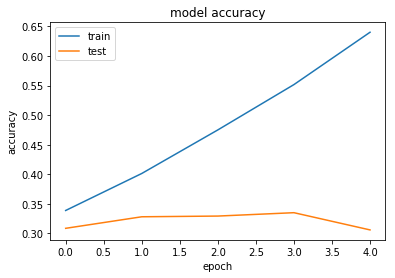

In [35]:
# plot accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

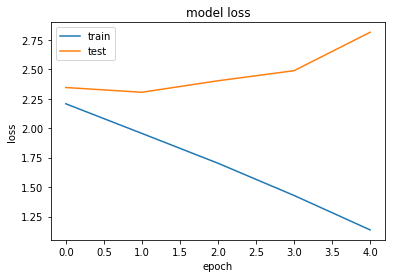

In [36]:
# plot loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

### Now it's time to test



In [37]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for i, char in enumerate(text):
        x[0, i, char_indices[char]] = 1.
        
    return x

In [38]:
import heapq
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [39]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [40]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

## Now let NN face real world

In [43]:
test_sent = "this is something that can be thought again and again but i do not have any idea why"
sent_4_NN = test_sent[:30]
print(sent_4_NN)
predict_completions(sent_4_NN, 5)

this is something that can be 


['the ', 'gented ', 'somion ', 'vomutions ', 'notions ']